#### Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its application.

Min-Max Scaling in Data Preprocessing
Min-Max scaling, also known as normalization, is a data preprocessing technique commonly used in machine learning to transform features to a fixed range, typically between 0 and 1. This process helps to improve the performance of machine learning algorithms by reducing the impact of features with large variances and making all features comparable on the same scale.

Benefits of using Min-Max scaling:
Improves convergence: By scaling features to a similar range, algorithms can converge faster and achieve better performance.
Reduces bias: Features with large variances can have an overwhelming influence on some algorithms. Scaling helps to reduce this bias and make all features equally important.
Improves interpretability: Scaling features can make it easier to understand the relative importance of each feature in a model.
Min-Max Scaling in Data Preprocessing
Min-Max scaling, also known as normalization, is a data preprocessing technique commonly used in machine learning to transform features to a fixed range, typically between 0 and 1. This process helps to improve the performance of machine learning algorithms by reducing the impact of features with large variances and making all features comparable on the same scale.


Calculate the minimum and maximum values of the feature across all data points.
Subtract the minimum value from each data point.
Divide the difference by the range (maximum - minimum).
This will transform all data points within the desired range, typically between 0 and 1.
Benefits of using Min-Max scaling:

Improves convergence: By scaling features to a similar range, algorithms can converge faster and achieve better performance.
Reduces bias: Features with large variances can have an overwhelming influence on some algorithms. Scaling helps to reduce this bias and make all features equally important.
Improves interpretability: Scaling features can make it easier to understand the relative importance of each feature in a model.
Example:

Imagine you have a dataset containing the height and weight of people. The height is measured in centimeters and can range from 150 to 200, while the weight is measured in kilograms and can range from 40 to 120.

If you train a machine learning model to predict weight based on height, the model will likely be biased towards the height feature due to its larger variance. This can lead to inaccurate predictions and hinder the model's performance.

By applying Min-Max scaling, you can transform both features to a range of 0 to 1. This will make the features more comparable and reduce the bias towards height. As a result, the model will be able to learn the relationship between height and weight more accurately and achieve better prediction results.

#### Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling?Provide an example to illustrate its application.

The Unit Vector technique, also known as vector normalization or vector scaling, is a feature scaling method that transforms the values of a feature vector into a unit vector. In other words, it scales the vector such that its magnitude becomes 1 while maintaining its direction. This normalization technique is particularly useful when dealing with algorithms that rely on the direction of the data points rather than their magnitude.

Differences from Min-Max Scaling:

Magnitude vs. Range:

Min-Max scaling focuses on transforming the range of values into a specified range (e.g., [0, 1]), while the Unit Vector technique concentrates on maintaining the direction of the vector and ensuring its magnitude is 1.
Use Cases:

Min-Max scaling is commonly used when the absolute values of features matter, and you want to bring them into a specific range. Unit vector scaling is more suitable when the direction or relative relationships between features are more critical.


In [1]:
import numpy as np

# Example data
ages = np.array([20, 25, 30, 35, 40])

# Min-Max scaling
def min_max_scaling(data):
    min_val = np.min(data)
    max_val = np.max(data)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

scaled_ages_min_max = min_max_scaling(ages)
print("Min-Max Scaled Ages:", scaled_ages_min_max)

# Unit Vector scaling
def unit_vector_scaling(data):
    norm = np.linalg.norm(data)
    scaled_data = data / norm
    return scaled_data

scaled_ages_unit_vector = unit_vector_scaling(ages)
print("Unit Vector Scaled Ages:", scaled_ages_unit_vector)


Min-Max Scaled Ages: [0.   0.25 0.5  0.75 1.  ]
Unit Vector Scaled Ages: [0.2901905  0.36273813 0.43528575 0.50783338 0.580381  ]


#### Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an example to illustrate its application.

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional representation while retaining as much of the original variability as possible. The fundamental idea behind PCA is to find the principal components, which are linear combinations of the original features, that capture the maximum variance in the data.

Key Steps in PCA:

Standardization: Standardize the features to have zero mean and unit variance.
Compute Covariance Matrix: Calculate the covariance matrix for the standardized data.
Eigenvalue and Eigenvector Decomposition: Compute the eigenvalues and eigenvectors of the covariance matrix.
Sort Components: Sort the eigenvalues in descending order and choose the top 
�
k eigenvectors (principal components), where 
�
k is the desired dimensionality of the reduced data.
Projection: Project the original data onto the selected principal components to obtain the lower-dimensional representation.

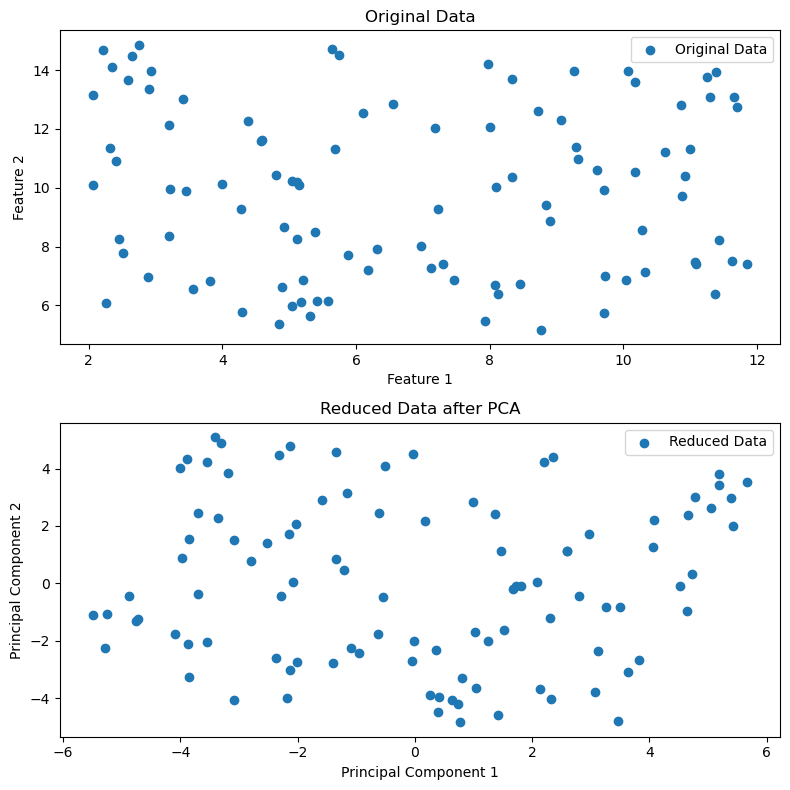

In [2]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create synthetic data with two features
np.random.seed(42)
data = np.random.rand(100, 2) * 10 + np.array([2, 5])

# Apply PCA with two components (retain both components for visualization)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Plot the original and reduced data
plt.figure(figsize=(8, 8))

# Original data
plt.subplot(2, 1, 1)
plt.scatter(data[:, 0], data[:, 1], label='Original Data')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Reduced data after PCA
plt.subplot(2, 1, 2)
plt.scatter(principal_components[:, 0], principal_components[:, 1], label='Reduced Data')
plt.title('Reduced Data after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()


#### Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature Extraction? Provide an example to illustrate this concept.

Principal Component Analysis (PCA) is often used for feature extraction in the context of dimensionality reduction. Feature extraction involves transforming the original set of features into a new set of features (principal components) that captures the most important information in the data. PCA achieves this by identifying the directions (principal components) along which the data varies the most.

How PCA is Used for Feature Extraction:

Standardization:

Standardize the features to ensure they have zero mean and unit variance.
Covariance Matrix:

Calculate the covariance matrix for the standardized data.
Eigenvalue and Eigenvector Decomposition:

Compute the eigenvalues and eigenvectors of the covariance matrix.
Principal Components:

The eigenvectors represent the principal components, and the corresponding eigenvalues indicate the amount of variance explained by each principal component.
Feature Transformation:

Select the top 
�
k eigenvectors based on the desired dimensionality reduction. Transform the original data using these selected eigenvectors to obtain the reduced feature set.

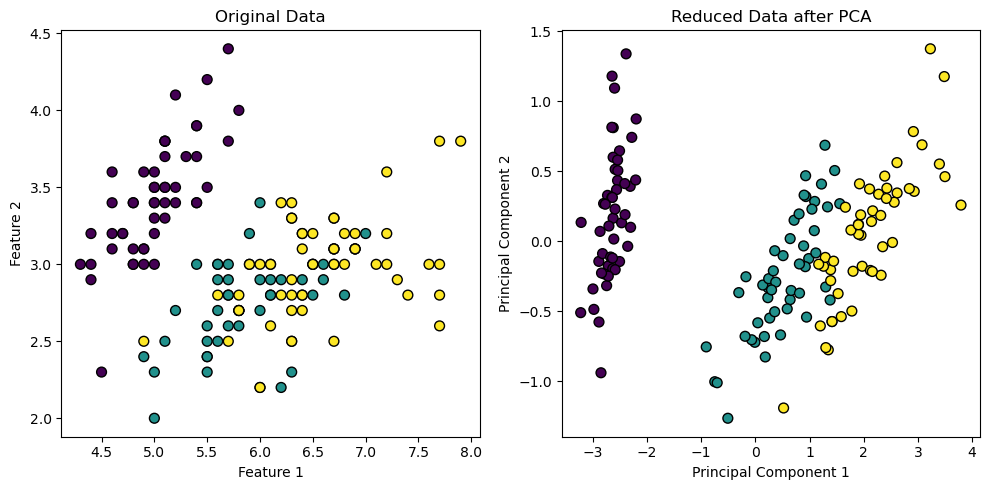

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA for feature extraction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the original and reduced data
plt.figure(figsize=(10, 5))

# Original data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Reduced data after PCA
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Reduced Data after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()



Preprocessing Food Delivery Data with Min-Max Scaling
Here's how Min-Max scaling can be used to preprocess the data for a food delivery recommendation system:

1. Identify features for scaling:

Price: This feature likely has a wide range (e.g., $5 to $50). Applying Min-Max scaling will ensure all prices are within a common range (e.g., 0 to 1), preventing features with larger variances from dominating the model.
Delivery time: Similar to price, delivery time can have a wide range (e.g., 15 minutes to 90 minutes). Scaling it will ensure all delivery times are comparable on the same scale.
Rating: This feature typically falls within a specific range (e.g., 1 to 5 stars). If the rating system uses decimals, scaling might not be necessary. However, if you want to compare ratings with other features, Min-Max scaling can be applied.
2. Standardize the data (optional):

While Min-Max scaling can be directly applied in many cases, standardizing the data (centering it around a mean of 0 and standard deviation of 1) can sometimes improve the performance of Min-Max scaling. This is particularly relevant when your features have significantly different means or variances.

3. Apply Min-Max scaling:

For each feature you identified for scaling:

Calculate the minimum and maximum values across all data points.
Subtract the minimum value from each data point.
Divide the difference by the range (maximum - minimum).
This will transform all data points within the desired range, typically between 0 and 1.

Benefits of using Min-Max scaling for food delivery data:

Improved model performance: By ensuring all features are on a similar scale, Min-Max scaling can help machine learning algorithms converge faster and achieve better accuracy in predicting user preferences and recommending food items.
Reduced bias: Features with large variances, like price, can have an overwhelming influence on some algorithms. Scaling helps to reduce this bias and make all features equally important in the model's decision-making process.
Improved interpretability: When features are scaled to a common range, it becomes easier to understand the relative importance of each feature in the model's predictions.
Additional considerations:

While Min-Max scaling works well for features with a known range like price and delivery time, it might not be necessary for features with fixed ranges like rating.
If you have categorical features in your dataset, consider using different encoding techniques like one-hot encoding or label encoding before applying Min-Max scaling.
Always remember to inverse-transform the scaled data before making any real-world interpretations or predictions.

#### Q6. You are working on a project to build a model to predict stock prices. The dataset contains many features, such as company financial data and market trends. Explain how you would use PCA to reduce the dimensionality of the dataset.

Using Principal Component Analysis (PCA) for dimensionality reduction in the context of predicting stock prices is a common and powerful technique. Here's a step-by-step guide on how you can leverage PCA for this purpose:

Steps to Use PCA for Dimensionality Reduction in Predicting Stock Prices:

Data Preprocessing:

Handle missing values, normalize or standardize the features, and address any other data preprocessing tasks.
Standardization:

Standardize the features to ensure they have zero mean and unit variance. This step is crucial for PCA, as it is sensitive to the scale of the features.
Applying PCA:

Apply PCA to the standardized dataset. This involves calculating the covariance matrix, finding the eigenvalues and eigenvectors, and sorting them in descending order.
Choosing the Number of Principal Components:

Decide on the number of principal components (features) you want to retain. This choice can be based on the explained variance or specific business requirements. For example, you might choose to retain 95% of the total variance.
Projection:

Project the original dataset onto the selected principal components. This transformation results in a reduced-dimensional dataset.
Modeling:

Train your stock price prediction model using the reduced-dimensional dataset. You can use various machine learning algorithms, such as regression models or time-series models.

#### Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the values to a range of -1 to 1.

In [12]:
import numpy as np

# Given dataset
data = np.array([1, 5, 10, 15, 20])

# Calculate X_min and X_max
X_min = np.min(data)
X_max = np.max(data)

# Apply Min-Max scaling
scaled_data = -1 + 2 * ((data - X_min) / (X_max - X_min))

print("Original Data:", data)
print("Min-Max Scaled Data (range -1 to 1):", scaled_data)


Original Data: [ 1  5 10 15 20]
Min-Max Scaled Data (range -1 to 1): [-1.         -0.57894737 -0.05263158  0.47368421  1.        ]


#### Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform Feature Extraction using PCA. How many principal components would you choose to retain, and why?


Feature Extraction in Healthcare Data using PCA
Given a dataset containing features like height, weight, age, gender, and blood pressure, we can use PCA for feature extraction. However, the number of principal components (PCs) to retain depends on several factors:

1. Variance explained:

Analyze the eigenvalues of the covariance matrix. Each eigenvalue represents the variance explained by its corresponding eigenvector (principal component). Choose PCs with the highest eigenvalues (cumulative variance explained) to retain the most significant information.
Typically, a threshold of 80-90% cumulative variance explained is considered good practice.
2. Data size and complexity:

Large datasets with high dimensionality might require retaining more PCs to capture the essential information.
Conversely, smaller datasets with less complexity might require fewer PCs to avoid overfitting.
3. Model type and purpose:

Some machine learning algorithms, like linear regression, might perform well with fewer principal components.
Other algorithms, like deep learning models, might benefit from more PCs to capture complex relationships.
4. Interpretation and domain knowledge:

If interpretability is crucial, retaining fewer PCs helps visualize and understand the model's reasoning.
Domain knowledge can guide the selection of important features represented by specific PCs.
In the specific case of the given features, consider the following:

Height, weight, and age: These features are likely to be inter-correlated, and a single PC might capture their combined influence.
Gender: This is a categorical variable and needs to be encoded (e.g., one-hot encoding) before applying PCA.
Blood pressure: This feature might be less correlated with the others and might require a dedicated PC to capture its unique information.
Based on these considerations:

Analyze the eigenvalues to determine the cumulative variance explained by each PC.
Start by retaining the PCs that explain at least 80% of the total variance.
Evaluate the model performance with different numbers of PCs to find the optimal balance between accuracy and interpretability.
Use domain knowledge to interpret the extracted PCs and ensure they capture the relevant aspects of the data.